Machine learning on steam/clear image data
--

This follows https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg and https://github.com/justmarkham/scikit-learn-videos

In [1]:
import pandas as pd
import numpy as np

**read data into dataframe, set up numeric target**

In [2]:
df = pd.read_csv('image_data.csv', index_col=0)
df['target']='target'
df.target[df['type']=='clear'] = 0
df.target[df['type']=='steam'] = 1

/home/sherburn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sherburn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [3]:
df.head()

,wid,std,type,target
20171201001002,33,9.810708,clear,0
20171201002002,19,5.766281,clear,0
20171201003002,34,10.099505,clear,0
20171201004002,67,19.627786,clear,0
20171201013002,47,13.601454,clear,0


**set up learning data, use only wid as a data feature, as correlated with std**

In [4]:
feature_cols = ['wid']
X = df[list(feature_cols)].values

y = df['target'].values
y=y.astype('int') #y type is object, need integer

**logistic regression model**

In [5]:
from sklearn.linear_model import LogisticRegression
#instatiate
logreg = LogisticRegression()

#fit
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
#predict for new data
X_new = [[21],[35]]
logreg.predict(X_new)

array([1, 0])

**calculate training accuracy, test the model on the input data**

In [7]:
#predict the response values for the observations in X
y_pred = logreg.predict(X)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.911051212938


**train/test split**

In [8]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [9]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(278, 1)
(93, 1)
(278,)
(93,)


In [10]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.903225806452


**evaluate classification**

In [12]:
#percentage of 1s = steam
y_test.mean()

0.31182795698924731

In [13]:
#percentage of 0s = clear
1-y_test.mean()

0.68817204301075274

In [14]:
#IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[58  6]
 [ 3 26]]


In [15]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [16]:
#how often is classifier correct
print((TP + TN) / float(TP + TN + FP + FN))

0.903225806452


In [17]:
#how often is classifier incorrect
print((FP + FN) / float(TP + TN + FP + FN))

0.0967741935484


In [18]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
print(TP / float(TP + FN))

0.896551724138


In [19]:
#false positive rate
print(FP / float(TN + FP))

0.09375


In [20]:
#false negative rate
print(FN / float(TN + FP))

0.046875


In [21]:
#precision rate, when a positive value is predicted (steam) how is this correct
print(TP / float(TP + FP))

0.8125


**how optimise? depends on what you set out to achieve**

False negative (steam image classified as clear) is more acceptable than clear image being classified as steam (as that image will not be viewed). So optimise for precision - when steam is predicted, how often is this correct

Would optimise for sensitivity if false positives (clear image being classified as steam) are more acceptable than false (steam image classified as clear)

**classification threshold**

In [22]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [23]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.90084853,  0.09915147],
       [ 0.78062362,  0.21937638],
       [ 0.99898678,  0.00101322],
       [ 0.74683965,  0.25316035],
       [ 0.23723575,  0.76276425],
       [ 0.20499359,  0.79500641],
       [ 0.12810688,  0.87189312],
       [ 0.99741702,  0.00258298],
       [ 0.62700673,  0.37299327],
       [ 0.70978716,  0.29021284]])

In [24]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.09915147,  0.21937638,  0.00101322,  0.25316035,  0.76276425,
        0.79500641,  0.87189312,  0.00258298,  0.37299327,  0.29021284])

In [28]:
# store the predicted probabilities for class 0
y_pred_prob = logreg.predict_proba(X_test)[:, 0]

In [30]:
#allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
Threshold can be adjusted to increase sensitivity or specificity
Sensitivity and specificity have an inverse relationship

Text(0,0.5,'Frequency')

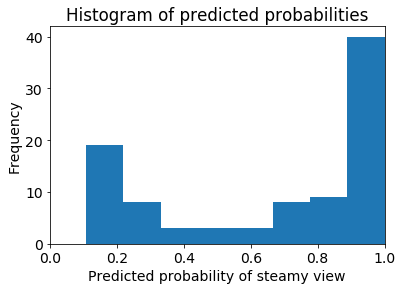

In [29]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of steamy view')
plt.ylabel('Frequency')

**k-fold cross-validation**

In [38]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)
print (scores.mean())

[ 0.76315789  0.78378378  0.94594595  0.83783784  1.          0.97297297
  0.91891892  0.97297297  0.89189189  0.97297297]
0.906045519203
